In [1]:
import numpy as np, pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt, seaborn as sns
import scipy
import warnings
import plotly.express as px
from itertools import product
import statsmodels.api as sm
import datetime
from tqdm import tqdm
import os

In [2]:
df = pd.read_csv(os.path.join(
    os.getcwd(), 
    "data", 
    "country_vaccinations.csv"))

In [3]:
print(f"Size of data is: {df.shape}")

Size of data is: (13307, 15)


In [4]:
print(f"Missing values in dataset: \n{df.isna().sum()}")

Missing values in dataset: 
country                                   0
iso_code                                  0
date                                      0
total_vaccinations                     5390
people_vaccinated                      6069
people_fully_vaccinated                8069
daily_vaccinations_raw                 6685
daily_vaccinations                      226
total_vaccinations_per_hundred         5390
people_vaccinated_per_hundred          6069
people_fully_vaccinated_per_hundred    8069
daily_vaccinations_per_million          226
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64


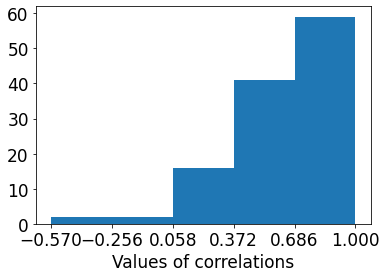

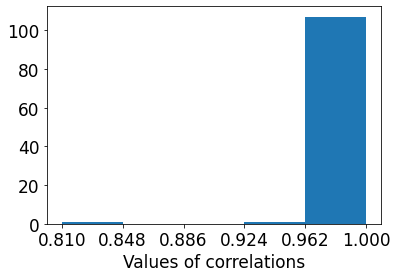

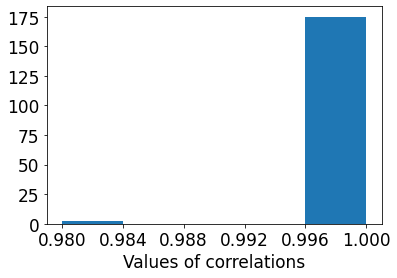

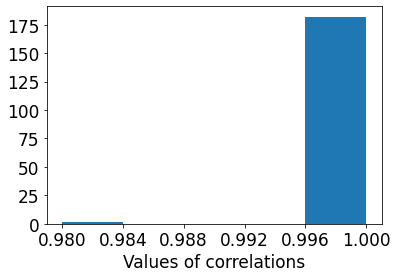

In [26]:
# check corr(total_vaccinations, total_vaccinations_per_hundred)
# one corr for one country and from all corrs make histogram 
# data are from different sources, so we will calculate correlation fo each country

def getCorrInCountryBetween(attr1, attr2, country, df):  
    # drop not a number values
    df = df[df[attr1].notna()]
    df = df[df[attr2].notna()]
    # take only two columns from one country
    df = df.loc[df['country'] == country]
    df = df[[attr1, attr2]]
    # calc correlation and take it
    res = df.corr()
    res = round(res.loc[attr1, attr2], 2)
    # result 
    # print(f"In {country} correlation between {attr1} and {attr2} is equivalent to {res}")
    return res

def makeCorrelationHistogramFor(attr1, attr2, df, retVal=False):
    correlations = []
    for country in df.country.unique():
        corr = getCorrInCountryBetween(attr1, attr2, country, df)
        if corr:
            correlations.append(corr)
    if retVal:
        return correlations
    counts, bins, bars = plt.hist(correlations, bins=5)
    
    # plt.title(f"Correlation between:\n{attr1}\nand\n{attr2}", fontsize=20)
    plt.xlabel("Values of correlations", fontsize=17)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.xticks(bins)
    plt.show()


# 226 NaN in both columns
makeCorrelationHistogramFor('daily_vaccinations', 
                            'daily_vaccinations_raw',
                            df)

# 8069 NaN in both columns
makeCorrelationHistogramFor('people_fully_vaccinated', 
                            'people_fully_vaccinated_per_hundred',
                            df)

# 6069 NaN in both columns
makeCorrelationHistogramFor('people_vaccinated', 
                            'people_vaccinated_per_hundred',
                            df)

# 5390 NaN in both columns
makeCorrelationHistogramFor('total_vaccinations', 
                            'total_vaccinations_per_hundred',
                            df)    

In [ ]:
# fill null values with 0 in paired columns, because
# they have correlation equivalent to 1

def fillNullWithZeroIn(column, df):
    df[column] = df[column].fillna(0)
    return df

df = fillNullWithZeroIn('daily_vaccinations', df)
df = fillNullWithZeroIn('daily_vaccinations_per_million', df)
df = fillNullWithZeroIn('people_fully_vaccinated', df)
df = fillNullWithZeroIn('people_fully_vaccinated_per_hundred', df)
df = fillNullWithZeroIn('people_vaccinated', df)
df = fillNullWithZeroIn('people_vaccinated_per_hundred', df)
df = fillNullWithZeroIn('total_vaccinations', df)
df = fillNullWithZeroIn('total_vaccinations_per_hundred', df)

print(f"Missing values in dataset: \n{df.isna().sum()}")

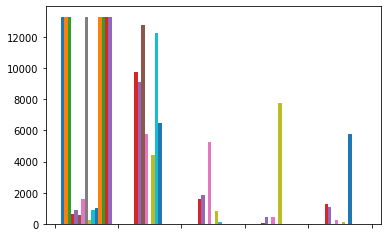

Correlation between 'daily_vaccinations_raw' and total_vaccinations is equivalent to 0.334


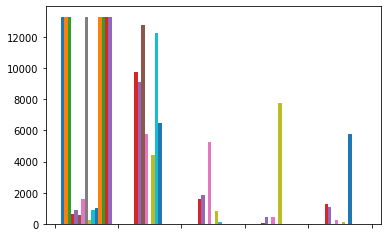

Correlation between 'daily_vaccinations_raw' and people_vaccinated is equivalent to 0.339


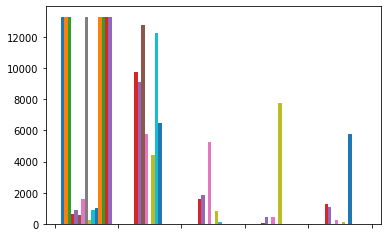

Correlation between 'daily_vaccinations_raw' and people_fully_vaccinated is equivalent to 0.346


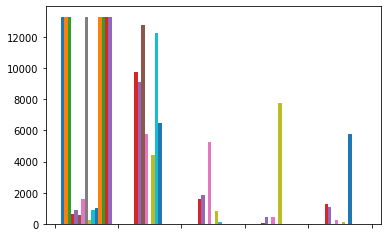

Correlation between 'daily_vaccinations_raw' and daily_vaccinations is equivalent to 0.622


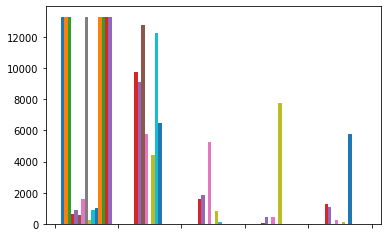

Correlation between 'daily_vaccinations_raw' and total_vaccinations_per_hundred is equivalent to 0.334


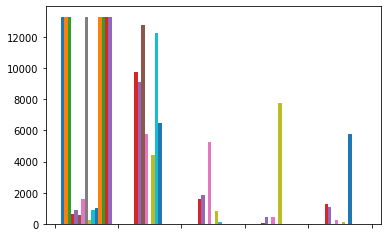

Correlation between 'daily_vaccinations_raw' and people_vaccinated_per_hundred is equivalent to 0.343


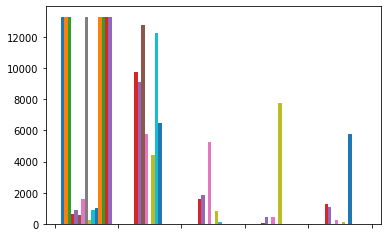

Correlation between 'daily_vaccinations_raw' and people_fully_vaccinated_per_hundred is equivalent to 0.351


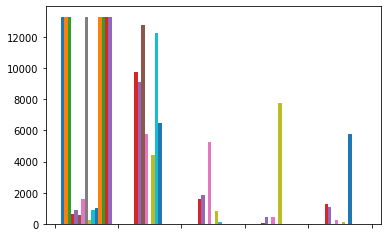

Correlation between 'daily_vaccinations_raw' and daily_vaccinations_per_million is equivalent to 0.622


In [25]:
# 5390 NaN in both columns

def checkCorrWithEachColumn(df, col):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for column in df.columns:
        if column == col:
            continue
        if df[column].dtypes in numerics:
            res = makeCorrelationHistogramFor(col, column, df, retVal=True)
            res = [x for x in res if x == x]
            from statistics import mean
            counts, bins, bars = plt.hist(df, bins=5)
            # plt.title(f"Correlation between:\n{attr1}\nand\n{attr2}", fontsize=20)
            #plt.xlabel("Values of correlations", fontsize=17)
            plt.xticks(fontsize=17)
            #plt.yticks(fontsize=17)
            plt.xticks(bins)
            plt.show()
            yield (mean(res), column)


for _tuple in checkCorrWithEachColumn(df, 'daily_vaccinations_raw'):
    corr, column = _tuple
    print(f"Correlation between 'daily_vaccinations_raw' and {column} is equivalent to {round(corr,3)}")

# nothing special, no correlation between some of column

In [1]:
plt.subplots(figsize=(8, 8))
sns.heatmap(np.array(df.corr()), annot=True, square=True)
plt.show()

NameError: name 'plt' is not defined

In [28]:
def makeCorrHeatMapFrom(country):
    df = vaccinations.loc[vaccinations['country'] == country]
    plt.subplots(figsize=(8, 8))
    sns.heatmap(df.corr(), annot=True, square=True)
    plt.title(f"Correlation map for {country}", fontsize=20)
    plt.show()
    
makeCorrHeatMapFrom('Poland')

NameError: name 'vaccinations' is not defined

In [ ]:
# some garbage analyze

def getCountryRankFor(df, attr):
    for country in df.country.unique():
        c_data = df.loc[vaccinations['country'] == country]
        res = c_data[attr].max()
        yield (country, res)
           

total = sorted(getTotalVaccPerCountry(df, 'people_fully_vaccinated'), key=lambda x: x[1], reverse=True)
part = sorted(getTotalVaccPerCountry(df, 'people_fully_vaccinated_per_hundred'), key=lambda x: x[1], reverse=True)

for x, y in zip(total, part):
    t = f"{x[0]} has total {x[1]}"
    p = f"{y[0]} has per 100 {y[1]}"
    print(t + "\t\t" + p)


